In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

In [2]:
url = "https://storage.googleapis.com/breathecode/project-files/bank-marketing-campaign-data.csv"

df_raw = pd.read_csv(url,sep=";")
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [3]:
df_raw.sample(10,random_state=2025)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4479,58,retired,married,basic.4y,unknown,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,yes
24230,51,entrepreneur,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8307,43,admin.,married,high.school,no,yes,no,telephone,jun,tue,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
4824,31,admin.,married,high.school,no,no,no,telephone,may,wed,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
12201,41,blue-collar,married,basic.6y,no,no,no,telephone,jul,wed,...,5,999,0,nonexistent,1.4,93.918,-42.7,4.956,5228.1,no
20123,36,housemaid,married,basic.6y,no,no,no,cellular,aug,mon,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
11995,44,admin.,married,university.degree,unknown,yes,yes,telephone,jun,thu,...,4,999,0,nonexistent,1.4,94.465,-41.8,4.955,5228.1,no
9514,45,admin.,married,university.degree,no,yes,no,telephone,jun,mon,...,5,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
20217,48,entrepreneur,married,university.degree,no,yes,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
8739,22,services,single,high.school,no,no,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no


In [4]:
#step 2 preprocessing
df_baking = df_raw.copy()
df_baking = df_baking.drop(columns=["default"])
	 	 	 	 	
df_baking['job'] = df_baking['job'].astype('category')
df_baking['marital'] = df_baking['marital'].astype('category')
df_baking['education'] = df_baking['education'].astype('category')
df_baking['housing'] = df_baking['housing'].astype('category')
df_baking['loan'] = df_baking['loan'].astype('category')
df_baking['contact'] = df_baking['contact'].astype('category')
df_baking['month'] = df_baking['month'].astype('category')
df_baking['day_of_week'] = df_baking['day_of_week'].astype('category')
df_baking['poutcome'] = df_baking['poutcome'].astype('category')
df_baking['y'] = df_baking['y'].astype('category')
df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   housing         41188 non-null  category
 5   loan            41188 non-null  category
 6   contact         41188 non-null  category
 7   month           41188 non-null  category
 8   day_of_week     41188 non-null  category
 9   duration        41188 non-null  int64   
 10  campaign        41188 non-null  int64   
 11  pdays           41188 non-null  int64   
 12  previous        41188 non-null  int64   
 13  poutcome        41188 non-null  category
 14  emp.var.rate    41188 non-null  float64 
 15  cons.price.idx  41188 non-null  float64 
 16  cons.conf.idx   41188 non-null  float64 
 17  euribor3m   

In [5]:
#Step3: EDA
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['y'], random_state=2025)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train.shape, df_test.shape

((32950, 20), (8238, 20))

In [6]:
display(df_train.describe(include='number').T)
display(df_train.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
age,32950.0,40.024097,10.412035,17.000,32.000,38.000,47.000,98.000
duration,32950.0,258.879909,259.011247,0.000,103.000,180.000,320.000,4199.000
campaign,32950.0,2.557269,2.769918,1.000,1.000,2.000,3.000,56.000
pdays,32950.0,962.867436,185.942153,0.000,999.000,999.000,999.000,999.000
previous,32950.0,0.169378,0.489152,0.000,0.000,0.000,0.000,7.000
emp.var.rate,32950.0,0.077159,1.572547,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,32950.0,93.573272,0.579627,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,32950.0,-40.518501,4.632317,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,32950.0,3.616255,1.735786,0.634,1.344,4.857,4.961,5.045
nr.employed,32950.0,5166.924395,72.284270,4963.600,5099.100,5191.000,5228.100,5228.100


,count,unique,top,freq
job,32950,12,admin.,8406
marital,32950,4,married,19931
education,32950,8,university.degree,9766
housing,32950,3,yes,17268
loan,32950,3,no,27203
contact,32950,2,cellular,21007
month,32950,10,may,10961
day_of_week,32950,5,mon,6850
poutcome,32950,3,nonexistent,28527
y,32950,2,no,29238


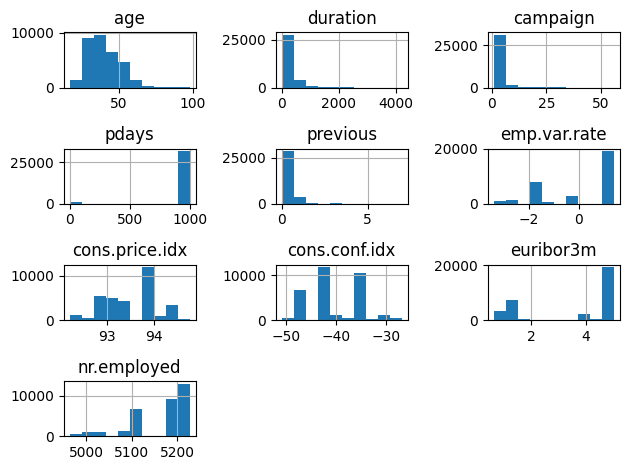

In [7]:
df_train.hist()
plt.tight_layout()
plt.show()

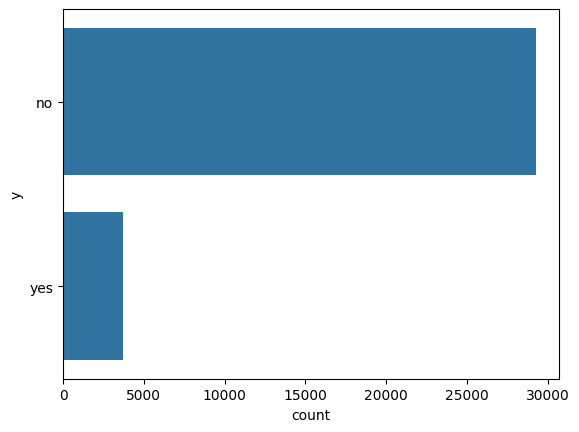

In [8]:
sns.countplot(data=df_train, y='y')
plt.show()

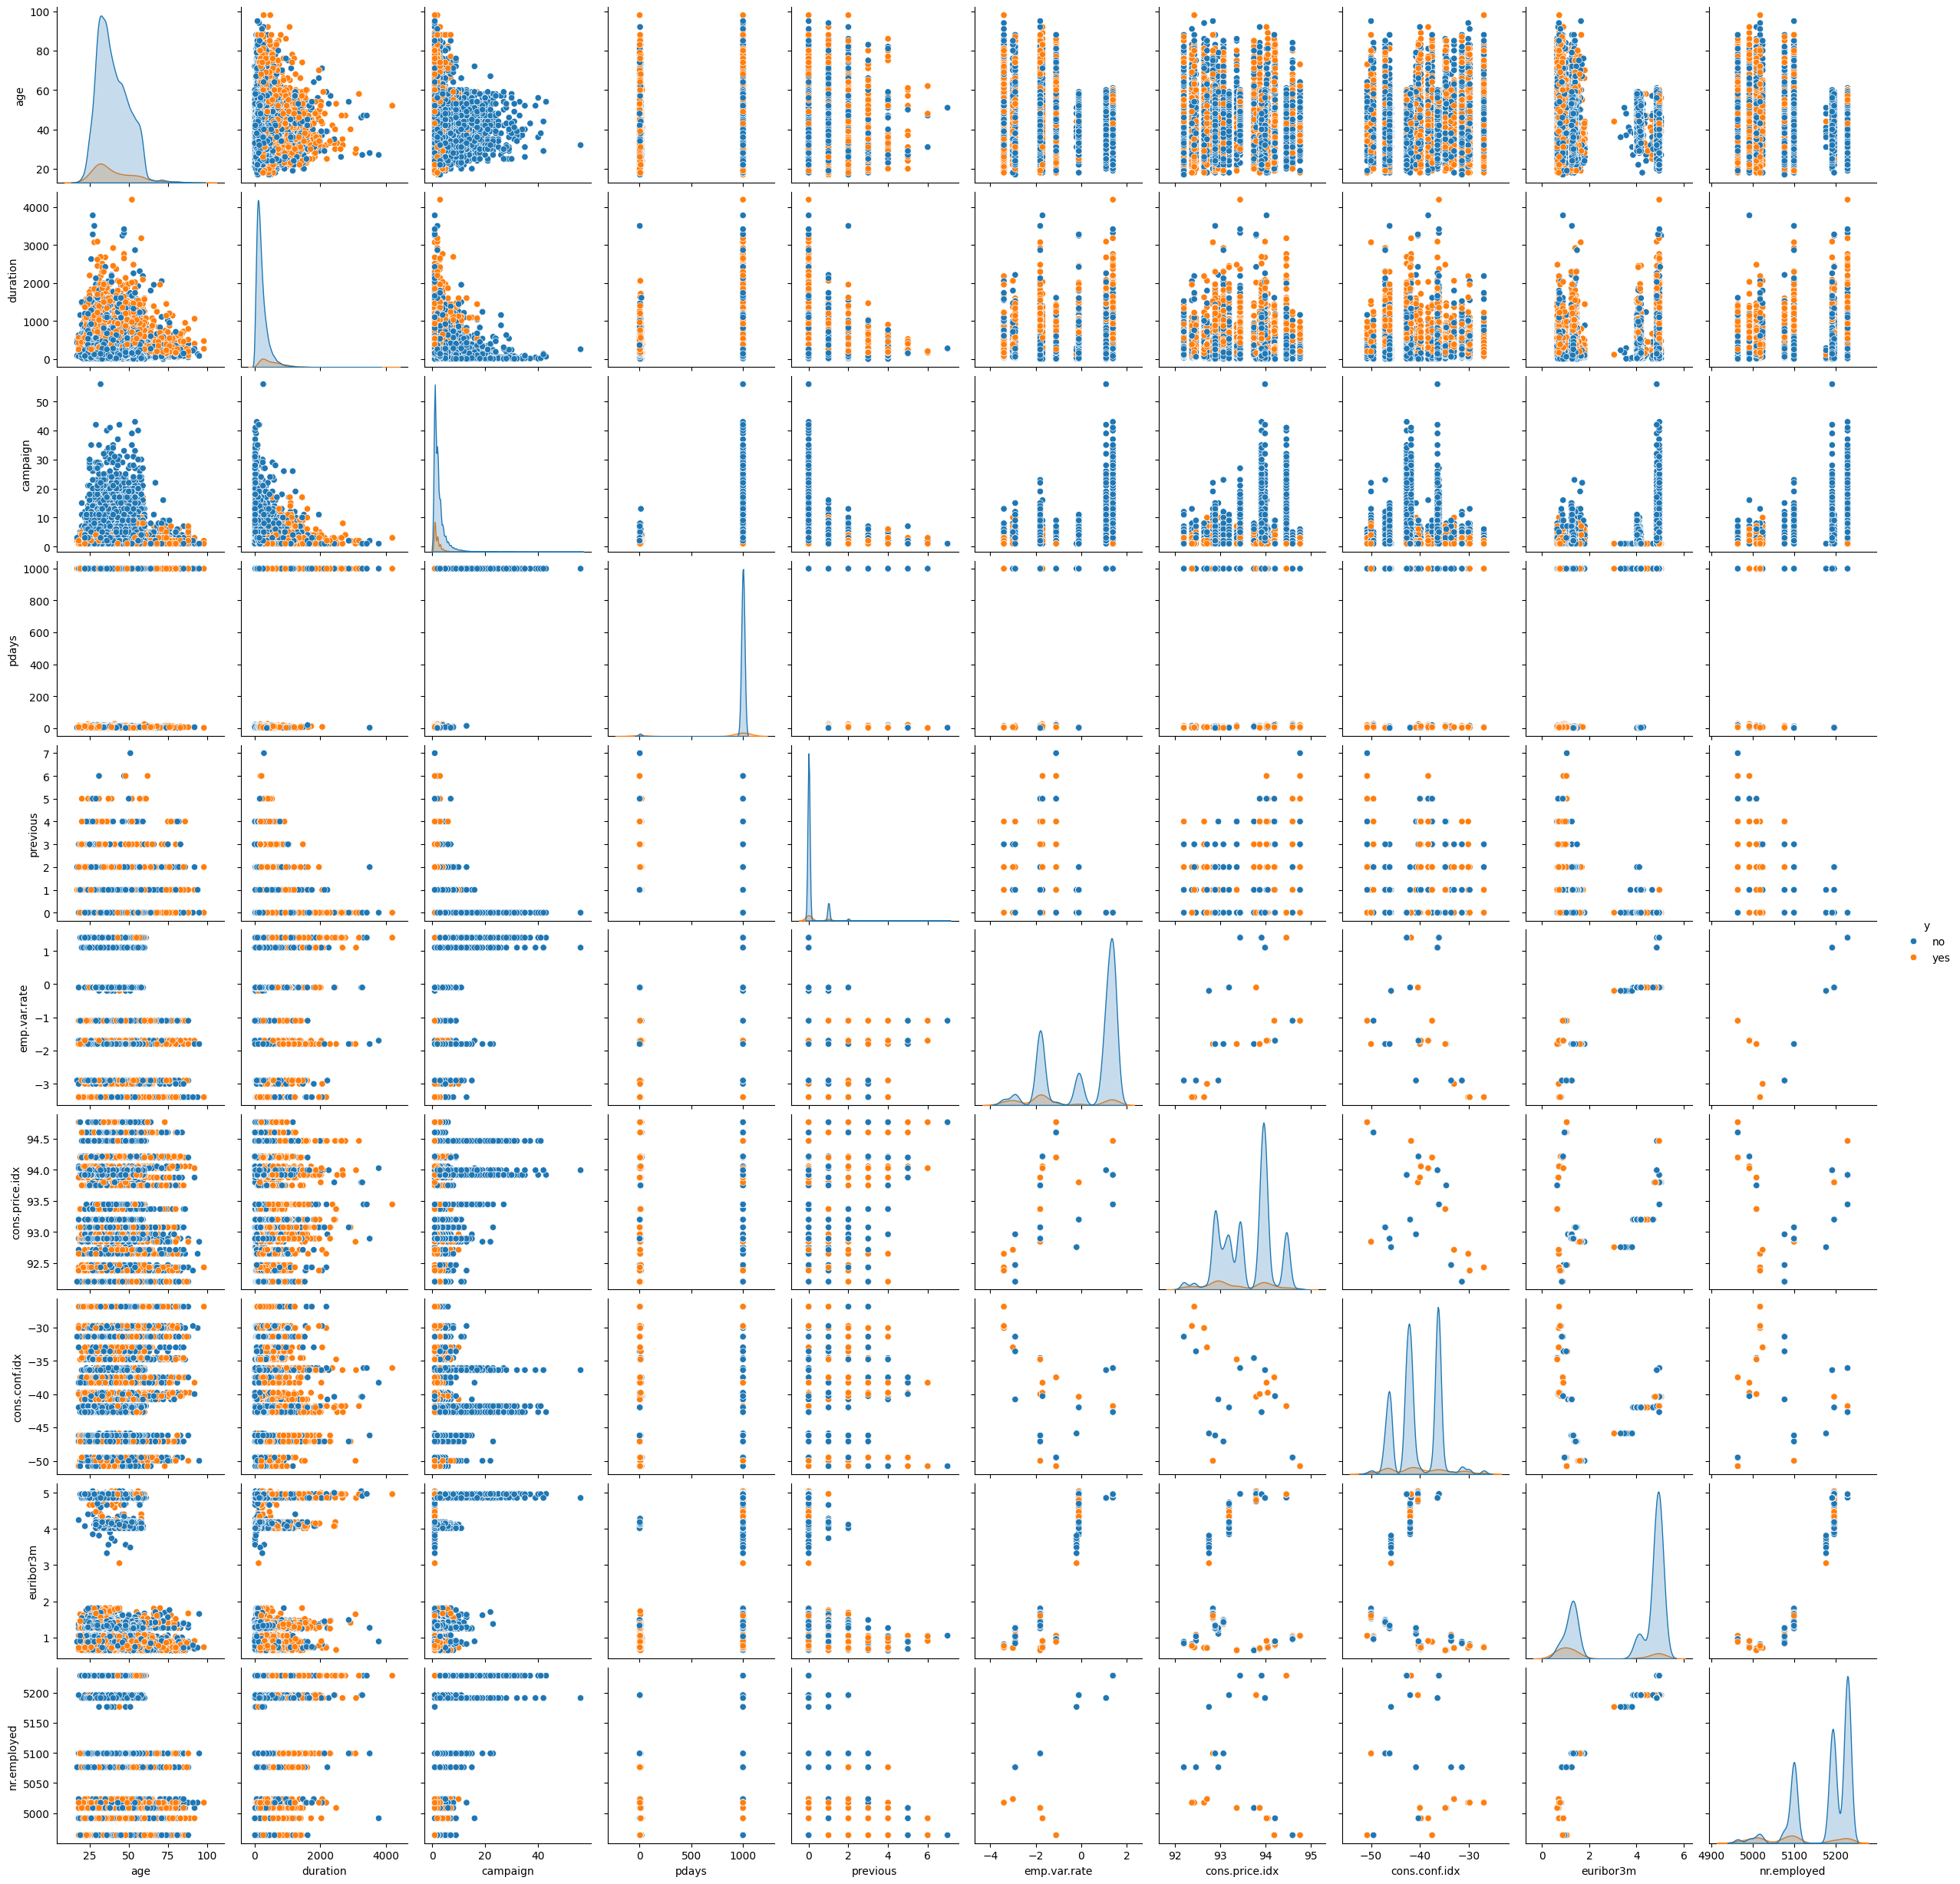

In [9]:
sns.pairplot(df_train,hue="y")
plt.show()

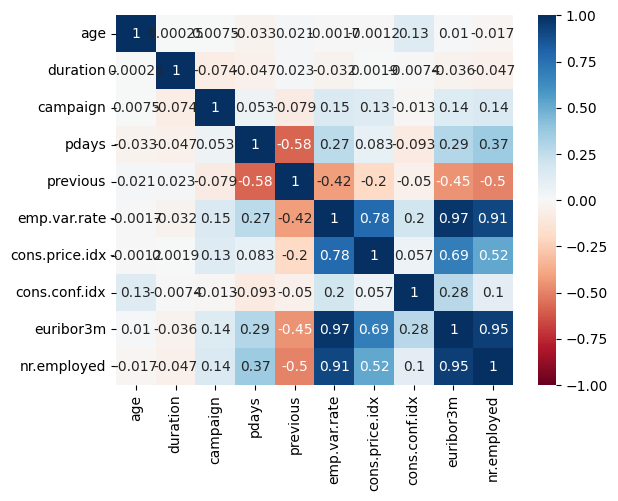

In [10]:
sns.heatmap(df_train.select_dtypes('number').corr(), vmin=-1, vmax=1, cmap='RdBu', annot=True)
plt.show()

In [ ]:
#Step 4: ML
X_train = df_train.drop(columns='y')
y_train = df_train['y']

X_test = df_test.drop(columns='y')
y_test = df_test['y']

label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

X_train_enc = X_train
X_test_enc = X_test 


In [15]:
num_cols = X_train.select_dtypes('number').columns
cat_cols = X_train.select_dtypes('category').columns

num_proc = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])
cat_proc = Pipeline(steps=[
    ('onehot',OneHotEncoder(drop='first'))
])
processor = ColumnTransformer(transformers=[
    ('num',num_proc,num_cols),
    ('cat',cat_proc,cat_cols)
])

In [16]:
model = Pipeline(steps=[
    ('proc', processor),
    ('tree', LogisticRegression())
])


In [17]:

model.fit(X_train_enc, y_train_enc)

,steps,"[('proc', ...), ('tree', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [18]:
y_hat_lr = model.predict(X_test_enc)
print(f"Accuracy Score: {accuracy_score(y_test_enc,y_hat_lr)}")

Accuracy Score: 0.9088370963826171
